## Detector model: Kiukas et al. vs PW

In [3]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gamma = Symbol('gamma')
t = Symbol('t')
tprime = Symbol('t\'')

In [5]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [6]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [7]:
init_printing ()


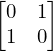

In [8]:
H

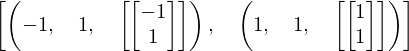

In [9]:
H.eigenvects()

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [10]:
def K(_gamma):
    return H - I*D(_gamma)

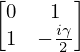

In [11]:
K(gamma)

In [12]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [13]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return re(abs(psi[0])**2 + abs(psi[1])**2)

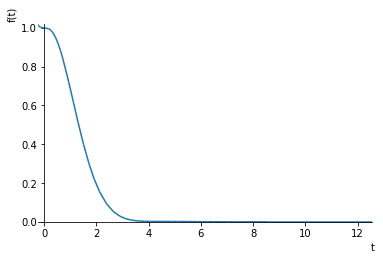

In [14]:
plot(lossy_norm(t),(t, -0.25, 4*pi))

In [15]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [16]:
lossy_norm_n(2)

In [17]:
X = np.linspace(1e-6, 4*np.pi, 500)  # avoid singularity in t=0

In [18]:
Y = lossy_norm_n(X)

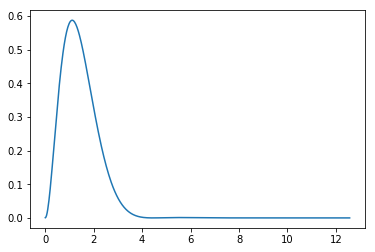

In [19]:
plt.plot(X, -np.gradient(Y, X))

### P-W "expectation value" technique

In [20]:
def U(_t):
    return exp(-I*H*_t)

In [21]:
def psi_unitary(_t):
    psi = U(_t) * Matrix([1,0])
    return psi

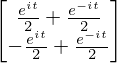

In [22]:
psi_unitary(t)

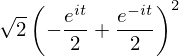

In [23]:
psi_unitary(t).dot( D(2*sqrt(2)) * psi_unitary(t) )

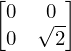

In [24]:
D(2*sqrt(2))

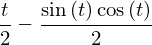

In [25]:
integrate(sin(t)**2, t)


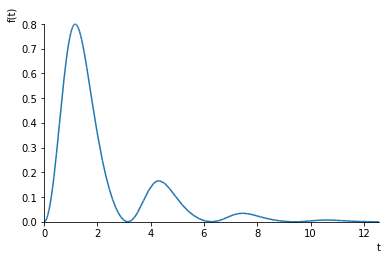

In [26]:
plot(sqrt(2)* sin(t)**2 * exp(sin(t)*cos(t)/2) * exp(-t/2), (t, 0, 4*pi))